<h1>Pipeline Creation</h1>

In [1]:
import pandas as pd
from joblib import dump
import pickle as pkl
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [ ]:
nltk.download('stopwords')

In [3]:
from TextPreprocessor import TextPreprocessor


pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer()
    ),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

TextPreprocessor initialized


In [4]:
data = pd.read_csv("../data/tipo1_entrenamiento_estudiantes.csv", encoding="utf-8", delimiter = ',', header  = 0)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data['Review'], data['Class'], test_size=0.3, random_state=28)

In [6]:
pipeline.fit(x_train, y_train)

Fitting TextPreprocessor...
Transforming text...
Preprocessing text...
Finished preprocessing text...


Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [7]:
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)

Transforming text...
Preprocessing text...
Finished preprocessing text...
Transforming text...
Preprocessing text...
Finished preprocessing text...


Precisión del clasificador de Random Forest: 0.4557765552264071


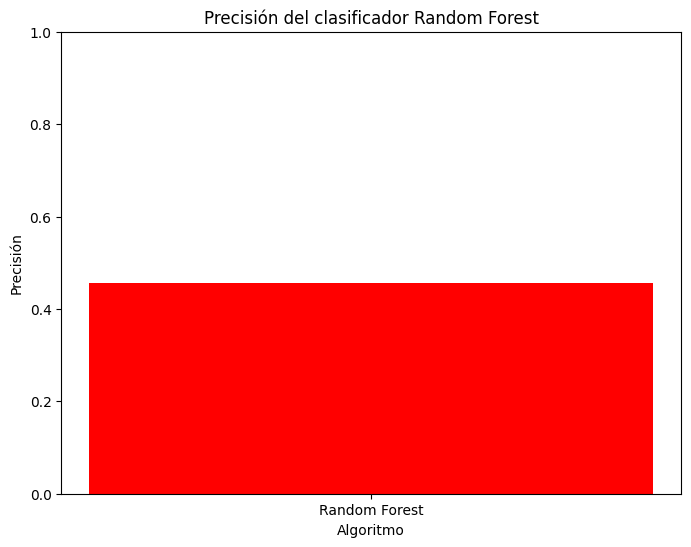

In [8]:
accuracy = accuracy_score(y_test, pred_test)
print("Precisión del clasificador de Random Forest:", accuracy)

# Crear la gráfica de precisión
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest'], [accuracy], color='red')
plt.xlabel('Algoritmo')
plt.ylabel('Precisión')
plt.title('Precisión del clasificador Random Forest')
plt.ylim(0, 1)
plt.show()

In [9]:
rutaPipeline =  "./pipeline.joblib"
dump(pipeline, rutaPipeline)

rutaPipeline =  "./pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)